In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('/Users/zhaosonglin/Desktop/programming/python/project/project5-panorama-thiefCat-main/data/source001/source001_01.jpg')
img2 = cv2.imread('/Users/zhaosonglin/Desktop/programming/python/project/project5-panorama-thiefCat-main/data/source001/source001_02.jpg')
img1_uint8 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX)
img2_uint8 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX)
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1_uint8,None)
kp2, des2 = sift.detectAndCompute(img2_uint8,None)
match = cv2.BFMatcher(normType=cv2.NORM_L2)
matches = match.knnMatch(des1, des2, k=2)
# print(len(matches))
# print(len(matches[0]))
# for m in matches:  # 若寻找三个最近邻点，则m包括三个KMacth
#     print(m[0].queryIdx, m[0].trainIdx, m[0].distance)  # m[0]表示距离最近的那个匹配
#     print(m[1].queryIdx, m[1].trainIdx, m[1].distance)  # m[1]表示距离第二近的那个匹配

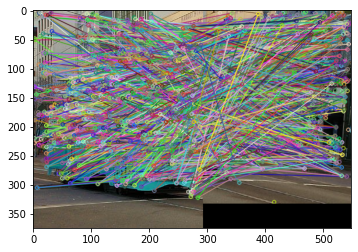

In [3]:
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

out_img1 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img1[:h1, :w1] = img1
out_img1[:h2, w1:w1 + w2] = img2
out_img1 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, out_img1)
plt.imshow(out_img1)
plt.show()

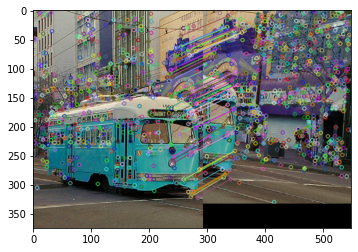

In [4]:
good_match = []
for m, n in matches:
    if m.distance < 0.5*n.distance:    # 如果第一个邻近距离比第二个邻近距离的0.5倍小，则保留
        good_match.append(m)

out_img2 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img2[:h1, :w1] = img1
out_img2[:h2, w1:w1 + w2] = img2
# p1 = [kp1[kpp.queryIdx] for kpp in good_match]  # kp1中挑选处的关键点
# p2 = [kp2[kpp.trainIdx] for kpp in good_match]  # kp2中挑选处的关键点
out_img2 = cv2.drawMatches(img1, kp1, img2, kp2, good_match, out_img2)
# drawMatchesKnn_cv2(img1, kp1, img2, kp2, good_match)
plt.imshow(out_img2)
plt.show()

In [5]:
MIN_MATCH_COUNT = 10
if len(good_match) > MIN_MATCH_COUNT:
    dst_pts = np.float32([ kp1[m.queryIdx].pt for m in good_match ]).reshape(-1,1,2)
    src_pts = np.float32([ kp2[m.trainIdx].pt for m in good_match ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    
    pts = np.float32([ [0,0],[0,h1-1],[w1-1,h1-1],[w1-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(img1,M)

    # imgRes = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print('not enough matches are found:', len(good_match))


print(M)
# plt.imshow(imgRes)
# plt.show()
# dst = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
# dst[0:img1.shape[0], 0:img1.shape[1]] = img1
plt.imshow(dst)
plt.show()

error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/core/src/matmul.dispatch.cpp:531: error: (-215:Assertion failed) scn + 1 == m.cols in function 'perspectiveTransform'
